In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraudTrain.csv')
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraudTest.csv')

train.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
# Keep only numeric & useful columns
train_clean = train[['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']]
test_clean  = test[['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']]

train_clean.head()


,amt,lat,long,merch_lat,merch_long,is_fraud
0,4.97,36.0788,-81.1781,36.011293,-82.048315,0.0
1,107.23,48.8878,-118.2105,49.159047,-118.186462,0.0
2,220.11,42.1808,-112.2620,43.150704,-112.154481,0.0
3,45.00,46.2306,-112.1138,47.034331,-112.561071,0.0
4,41.96,38.4207,-79.4629,38.674999,-78.632459,0.0


In [ ]:
X_train = train_clean.drop('is_fraud', axis=1)
y_train = train_clean['is_fraud']

X_test = test_clean.drop('is_fraud', axis=1)
y_test = test_clean['is_fraud']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
print("Model trained successfully!")


ValueError: Input y contains NaN.

In [ ]:
train_clean.isnull().sum()


,0
amt,0
lat,1
long,1
merch_lat,1
merch_long,1
is_fraud,1


In [ ]:
train_clean = train_clean.dropna(subset=['is_fraud'])
test_clean = test_clean.dropna(subset=['is_fraud'])


In [ ]:
# Keep only numeric & useful columns
train_clean = train[['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']]
test_clean  = test[['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']]

train_clean.head()

,amt,lat,long,merch_lat,merch_long,is_fraud
0,4.97,36.0788,-81.1781,36.011293,-82.048315,0.0
1,107.23,48.8878,-118.2105,49.159047,-118.186462,0.0
2,220.11,42.1808,-112.2620,43.150704,-112.154481,0.0
3,45.00,46.2306,-112.1138,47.034331,-112.561071,0.0
4,41.96,38.4207,-79.4629,38.674999,-78.632459,0.0


In [ ]:
train_clean = train_clean.dropna()
test_clean = test_clean.dropna()


In [14]:
X_train = train_clean.drop('is_fraud', axis=1)
y_train = train_clean['is_fraud']

X_test = test_clean.drop('is_fraud', axis=1)
y_test = test_clean['is_fraud']


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
print("Model trained successfully!")


Model trained successfully!


In [17]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print("Accuracy:", acc)


Accuracy: 0.9964088752084135


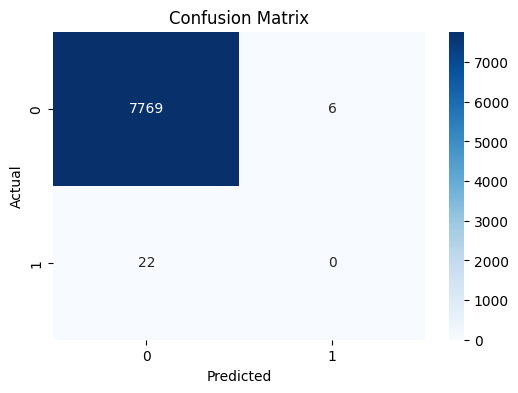

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
